In [1]:
### automatically refresh the buffer

%load_ext autoreload
%autoreload 2

### solve the auto-complete issue

%config Completer.use_jedi = False

### lvl 1 setups

import sys
sys.path.append('/portal1/dell/GitHub/WAYS')
sys.path.append('/portal1/dell/GitHub/sanctuary')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### lvl 2 setups (systerm)

import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import hstack
from matplotlib import pyplot
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import warnings
warnings.filterwarnings('ignore')

In [2]:
from numpy import polyfit, poly1d
from stats import cr

In [3]:
import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from stats import cr
from gistool import basemap, stack_image, stack_shp, stack_hatch, stack_shp_cn, ncslice
from spatial import upscale
import statsmodels.formula.api as smf
from scipy.stats.mstats import theilslopes
from scipy.stats import kendalltau
import cartopy.crs as ccrs

import pandas as pd
import scipy.stats as scs
import matplotlib.pyplot as plt

import climate_indices as indices
from climate_indices import compute
from climate_indices import utils, indices

In [4]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression

In [5]:
shp='/portal3/gis/LMRB_Boundary/Lancang_Mekong_Basin/Lancang_Mekong_Basin.shp'
shp_mrb = '/portal3/gis/LMRB_Boundary/Lancang_Mekong_Basin/Mekong_Basin.shp'
shp_lrb = '/portal3/gis/LMRB_Boundary/Lancang_Mekong_Basin/Lancang_Basin.shp'

In [6]:
from PIL import Image

In [7]:
im = Image.open('GlobalDEM/GDEM-10km-BW (1).tif')

In [8]:
im_array = np.array(im)
im_array = im_array.astype(float)
im_array[im_array == 0] = np.nan

In [9]:
lon = np.linspace(-180,180,4320)
lat = np.linspace(90,-90,2160)

In [10]:
ds_gdem = xr.Dataset({'dem': (['lat', 'lon'], -im_array)},
                    coords={'lon': (['lon'], lon),
                            'lat': (['lat'], lat)})

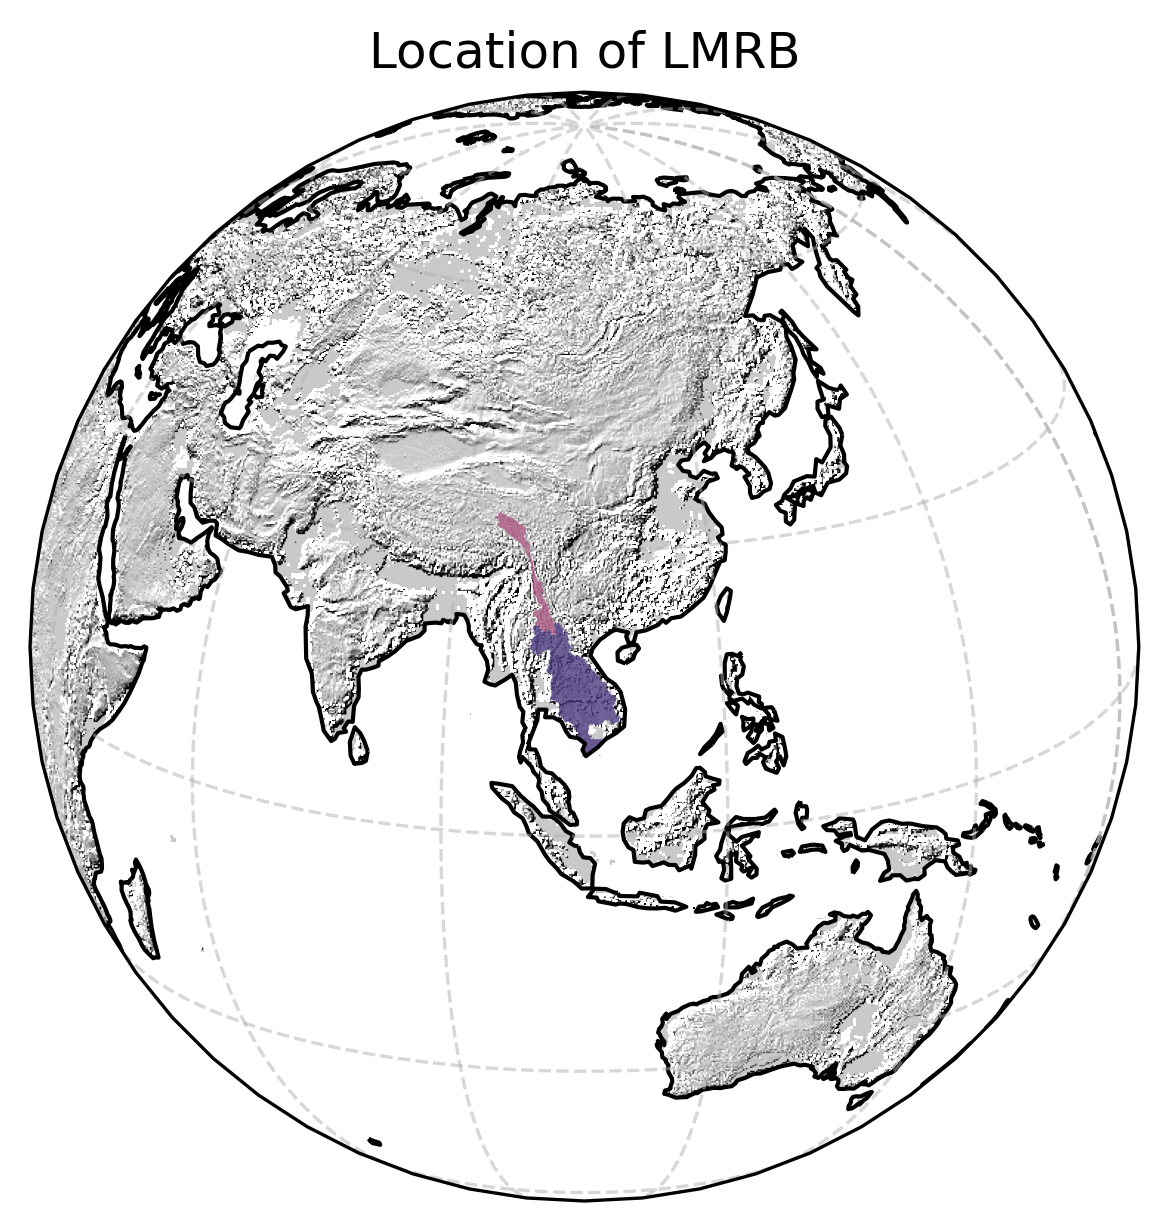

In [39]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

projection = ccrs.Orthographic(central_longitude=105, central_latitude=20)

fig, ax = plt.subplots(subplot_kw={'projection': projection},dpi=300)

ax.set_global()
ax.coastlines()
ax.gridlines(ls='--',alpha=0.5, xlocs=range(-180, 181, 30), ylocs=range(-90, 91, 30))
im = ax.imshow(-im_array, transform=ccrs.PlateCarree(),cmap='gray', vmax=-100)
ax = stack_shp(ax, shp_lrb, facecolor='#ad5a85', edgecolor='none', linewidth=1, alpha=0.8)
ax = stack_shp(ax, shp_mrb, facecolor='#4d3c81', edgecolor='none', linewidth=1, alpha=0.8)
ax.set_title('Location of LMRB')

plt.show()
